# Term frequency

#### Create df 

In [47]:
import pandas as pd
df = pd.read_csv("output/export_without_quotes.csv", delimiter="\t", encoding='utf-8')
df

,bsv,type,context,word,prefLabel,context.1,location,features
0,20190619_LOR_BSV_Viticulture_cle8c2fdf,html,n° 09 BILAN MÉTÉO,FRUIT,culture fruitière,Données du 10/06 au,392-397,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
1,20190619_LOR_BSV_Viticulture_cle8c2fdf,html,ociel.fr PHENOLOGIE,FRUIT,culture fruitière,La floraison débute,765-770,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
2,20190619_LOR_BSV_Viticulture_cle8c2fdf,html,2 BSV n° 09 OÏDIUM,FRUIT,culture fruitière,Tous les éléments d,1817-1822,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
3,20190619_LOR_BSV_Viticulture_cle8c2fdf,html,e sensibilité de la,vigne,vigne,(floraison). Survei,2253-2258,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
4,20190619_LOR_BSV_Viticulture_cle8c2fdf,html,feuilles. TORDEUSES,FRUIT,culture fruitière,Tous les éléments d,2432-2437,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
...,...,...,...,...,...,...,...,...
1746,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,html,"printemps, comme la",jachère,gel,fleurie qui a un fa,24717-24724,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
1747,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,html,tenir des stocks de,semences,semence,d'ambroisie. Les da,24920-24928,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
1748,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,html,rges de gestion des,jachères,gel,sont très favorable,25022-25030,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."
1749,bsv_viti_mp_gaillac_n18_30072019_cle0fe8aa,html,ution d'un stock de,semences,semence,qui sera particuliè,25558-25566,"type=GOL, uri=http://ontology.inrae.fr/frenchc..."


#### Count terms

In [48]:
df['prefLabel'].describe()

count      1751
unique       46
top       vigne
freq        873
Name: prefLabel, dtype: object

In [49]:
df['bsv'].describe()

count                                    1751
unique                                     77
top       BSV-viti-RA-15_09-07-2019_cle01ba24
freq                                      103
Name: bsv, dtype: object

In [50]:
counts = df['prefLabel'].value_counts()
dico = counts.to_dict()

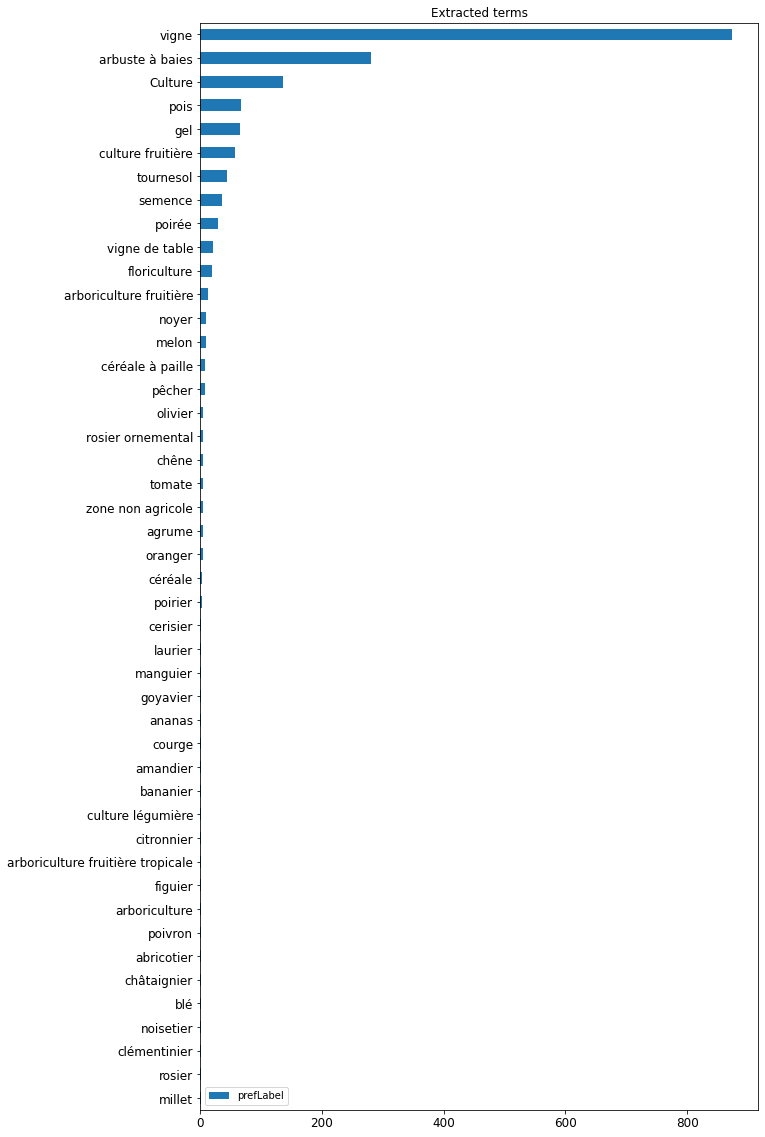

In [51]:
ax = counts.plot(kind='barh', title ="Extracted terms",figsize=(10,20),legend=True, fontsize=12 )
ax.invert_yaxis()


In [52]:
import plotly.graph_objects as go


features = list(dico.values()) 
true_labels = list(dico.keys())
size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]

In [53]:
import plotly.express as px

freq_df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(freq_df, x=true_labels, y=features)
fig.show()

###  Term frequence per doc

In [54]:
df1 = df[['bsv','prefLabel']].groupby(['bsv', 'prefLabel'])['prefLabel'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             
df1

,bsv,prefLabel,count
16,BSV-viti-RA-15_09-07-2019_cle01ba24,arbuste à baies,54
22,BSV-viti-RA-16_16-07-2019_cle0bfb92,arbuste à baies,45
20,BSV-viti-RA-15_09-07-2019_cle01ba24,vigne,27
238,BSV_viti_12_du_02-07-19-1_cle05965f,vigne,26
26,BSV-viti-RA-16_16-07-2019_cle0bfb92,vigne,26
...,...,...,...
269,bsv_raisin_n12_18062019_cle8578dc,vigne,1
148,BSV_NA_VIGNE_Nord_Aquitaine_20_20190806_cle891ea2,Culture,1
271,bsv_raisin_n15_16072019_cle8c8617,Culture,1
144,BSV_NA_VIGNE_Nord_Aquitaine_19_20190730_cle819684,Culture,1


In [55]:
import plotly.io as pio


data = [dict(
  type = 'scatter',
  x = df['prefLabel'].str.lower(),
  y = df['bsv'],
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = df['prefLabel'].str.lower(),
    
  )]
)]

fig_dict = dict(data=data)
pio.show(fig_dict, validate=False)

# Spelling mistakes

In [56]:
words = []
with open('output/words.txt', encoding = 'utf8') as f:
    for line in f.readlines():
            words.append((line.strip()))
    
words[3]

'%des'

In [57]:
import re

corrections = []
with open('output/language_tool.txt', encoding = 'utf8') as f:
    for line in f.readlines():
            corrections.append((line.strip()))
            
corr = '\t'.join(corrections) # list to string
corr = corr.replace('\t\t', '') # remove consecutive tabs (here ~always occuring at the beginning of a line)
lines = re.split(r'\^+', corr) # split by delimiter
lines[0]



'1.) Line 4, column 1, Rule ID: FR_SPELLING_RULE prio=-100\tMessage: Faute de frappe possible trouvée.\tSuggestion: des; dès; dés; odes; ides\t! " % %des & \' \'A \'identit ( (33) (40) (47) (64) (stade...\t'

In [58]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
    

dico = {'Line':[], 'Column':[], 'Rule ID':[], 'Prio':[], 'Message':[], 'Word':[], 'Suggestion':[]}
for line in lines:
    if line.strip():
        l = find_between(line, 'Line ', ',')
        
        
        
        if l != "":
            dico['Line'].append(l)
            l_num = int(l) - 1
            word = words[l_num]
            dico['Word'].append(word)
    
    
            col = find_between(line, 'column ', ',')
            dico['Column'].append(col)
    
            rule = find_between(line, 'Rule ID: ', 'prio')
            dico['Rule ID'].append(rule)
    
            prio = find_between(line, 'prio=', '\t')
            dico['Prio'].append(prio)
    
            mess = find_between(line, 'Message: ', '\t')
            dico['Message'].append(mess)
    
            sugg = find_between(line, 'Suggestion: ', '\t')
            dico['Suggestion'].append(sugg)
    

In [59]:
language_tool = df.from_dict(dico)
language_tool.to_csv('output/language_tool.csv', encoding = 'utf8', sep = '\t')
language_tool

,Line,Column,Rule ID,Prio,Message,Word,Suggestion
0,4,1,FR_SPELLING_RULE,-100,Faute de frappe possible trouvée.,%des,des; dès; dés; odes; ides
1,8,2,FR_SPELLING_RULE,-100,Faute de frappe possible trouvée.,'identit,identité
2,9,1,,,Ne placez pas d’espace après une parenthèse ou...,(,(
3,14,7,,,Ne placez pas d’espace avant une parenthèse fe...,(stade,)
4,17,2,ESPACE_UNITES[1],1,Il faut utiliser une espace insécable avant l’...,+1°C,1 °C
...,...,...,...,...,...,...,...
1841,6198,1,FR_SPELLING_RULE,-100,Faute de frappe possible trouvée.,éthodes,études; méthodes; étoles
1842,6206,1,FR_SPELLING_RULE,-100,Faute de frappe possible trouvée.,éva,Éva; EVA; Eva; va; TVA
1843,6218,1,,,« évolutif » et « évolution » ne semblent pas ...,évolution,
1844,6221,1,,,Faute de frappe possible : un mot est répété :...,être,être


In [60]:
language_tool['Word'].describe()

count              1846
unique             1802
top       ans - Février
freq                  3
Name: Word, dtype: object

In [61]:
counts_lt = language_tool['Word'].value_counts()
dico_lt = counts_lt.to_dict()
dico_lt

{'ans - Février': 3,
 '1mm': 2,
 '2ième': 2,
 'urticant': 2,
 'bable': 2,
 '8ème': 2,
 'maine': 2,
 '5cm': 2,
 'bdtfx-nn': 2,
 '4mm': 2,
 '3ème': 2,
 '2ème': 2,
 '+2°C': 2,
 '3eme': 2,
 'an': 2,
 '2nd': 2,
 '15+4mm': 2,
 'journée': 2,
 'Queyssac': 2,
 'bsv': 2,
 'fastidiosa-une': 2,
 'ÉCOPHYTO': 2,
 '2eme': 2,
 '- sur': 2,
 'Verneuil': 2,
 'contaminants': 2,
 'rubrique': 2,
 'vectrice': 2,
 '9mm': 2,
 '2mm': 2,
 '3ième': 2,
 'floral': 2,
 'fastidiosa': 2,
 'rd': 2,
 '3mm': 2,
 'usp=sharing': 2,
 '6mm': 2,
 'anormal': 2,
 'oospore': 2,
 '4ème': 2,
 '5mm': 2,
 'ser': 2,
 'ya': 2,
 'contact@paca': 1,
 'tursan': 1,
 'Sigolsheim': 1,
 'juill': 1,
 'Inoki': 1,
 'Tavel': 1,
 'Eété': 1,
 'prévi': 1,
 't': 1,
 'Vinovalie': 1,
 'Bec - FREDON': 1,
 'Axvigne': 1,
 'Dead': 1,
 'psilostachya': 1,
 'Perret': 1,
 "L'Epi": 1,
 'Mar': 1,
 'FOS': 1,
 'proportionnel': 1,
 '0parcelles': 1,
 'ALBERES': 1,
 'RESISTANCE': 1,
 'latent': 1,
 'Razès': 1,
 'àjeudi': 1,
 '3°C': 1,
 'CHAVAGNAC': 1,
 'mp': 1,
 'FDCE